# Systems of Differential Equations and Scipy

CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

Reference: Chapter 17 in McClarren.

## Learning Objectives

After studying this notebook, completing the activties, and attending class, you should be able to:
* Integrate systems of differential equations in Python. Explore the stability and oscillatory properties.
* Understand how to implement the different integration methods in scipy.

In [14]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

## Systems of Differential Equations

Often we will be concerned with solving a system of ODEs rather than a single ODE.  The explicit methods translate to this scenario directly. However, we will restrict ourselves to systems that can be written in the form
$$ \mathbf{y}'(t) = \mathbf{A}(t) \mathbf{y} + \mathbf{c}(t), \qquad \mathbf{y}(0) = \mathbf{y}_0.$$

In this equation $\mathbf{A}(t)$ is a matrix that can change over time, and $\mathbf{c}(t)$ is a function of $t$ only. For systems of this type our methods are written as follows:

<b>Forward Euler</b> (Explicit)
$$ \mathbf{y}^{n+1} = \mathbf{y}^{n} + \Delta t \mathbf{A}(t^n) \mathbf{y}^n + \Delta t\mathbf{c}(t^n)$$

<b>Backward Euler</b> (Implicit)
$$ \mathbf{y}^{n+1} = \mathbf{y}^{n} + \Delta t \mathbf{A}(t^{n+1}) \mathbf{y}^{n+1} + \Delta t\mathbf{c}(t^{n+1}),$$
which rearranges to
$$\left( \mathbf{I} - \Delta t \mathbf{A}(t^{n+1})\right)\mathbf{y}^{n+1} = \mathbf{y}^{n} + \Delta t\mathbf{c}(t^{n+1}).$$ Therefore, for backward Euler we will have to solve a linear system of equations at each time step.


<b>Crank-Nicolson</b> (Implicit)
$$\left( \mathbf{I} - \frac{\Delta t}{2} \mathbf{A}(t^{n+1})\right)\mathbf{y}^{n+1} = \left( \mathbf{I} + \frac{\Delta t}{2} \mathbf{A}(t^{n})\right)\mathbf{y}^{n} + \frac{\Delta t}{2}\left(\mathbf{c}(t^{n+1}) + \mathbf{c}(t^{n})\right).$$
This will also involve a linear solve at each step.

<b>Fourth-order Runge-Kutta</b> (Implicit)
$$\mathbf{y}^{n+1} = \mathbf{y}^n + \frac{1}{6}\left(\Delta \mathbf{y}_1 + 2 \Delta \mathbf{y}_2 + 2 \Delta \mathbf{y}_3 + \Delta \mathbf{y}_4\right),$$
$$\Delta y_1 = \Delta t \mathbf{A}(t^n)y^n + \mathbf{c}(t^n),$$ 
$$\Delta y_2 = \Delta t \mathbf{A}\left(t^n+ \frac{\Delta t}{2}\right)\left(y^n + \frac{\Delta y_1}{2}\right) + \Delta t\mathbf{c}(t^n + \frac{\Delta t}{2}),$$
$$\Delta y_3 =  \Delta t \mathbf{A}\left(t^n+ \frac{\Delta t}{2}\right)\left(y^n + \frac{\Delta y_2}{2}\right) + \Delta t\mathbf{c}(t^n + \frac{\Delta t}{2}),$$
$$\Delta y_4 =  \Delta t \mathbf{A}\left(t^n+ {\Delta t}\right)\left(y^n + {\Delta y_3}\right) + \Delta t\mathbf{c}(t^n + \Delta t).$$
</ul>

As noted above, the implicit methods require the solution of the linear system at each timestep, while the explicit methods do not.

We can define these ODE solvers for systems now.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Fill in the missing comments below. This is excellent exam practice.
</div>

In [2]:
def forward_euler_system(Afunc,c,y0,Delta_t,numsteps):
    """Perform numsteps of the forward euler method starting at y0
    of the ODE y'(t) = A(t) y(t) + c(t)
    Args:
        Afunc: function to compute A matrix
        c: nonlinear function of time
        Delta_t: time step size
        numsteps: number of time steps
        
    Returns:
        a numpy array of the times and a numpy
        array of the solution at those times
    """
    # 
    numsteps = int(numsteps)
    unknowns = y0.size
    
    # 
    y = np.zeros((unknowns,numsteps+1))
    t = np.arange(numsteps+1)*Delta_t
    
    # 
    y[0:unknowns,0] = y0
    
    #
    for n in range(1,numsteps+1):
        yold = y[0:unknowns,n-1]
        
        #
        A = Afunc(t[n-1])
        
        #
        y[0:unknowns,n] = yold + Delta_t * (np.dot(A,yold) + c(t[n-1]))
    return t, y

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Share your comments with a partner.
</div>

As a test of our method we will solve the ODE:

$$y''(t) = -y(t),\qquad y(0) = 1,\quad y'(0) = 0.$$

Wait, that's not a system, and we haven't covered how to do ODEs of with derivatives other than first derivatives. We can write this as a system using the definition 

$$u(t) = y'(t),$$ to get
$$\frac{d}{dt}\begin{pmatrix} u\\y\end{pmatrix} = \begin{pmatrix} 0 & -1\\ 1 & 0\end{pmatrix}\begin{pmatrix} u\\y\end{pmatrix} .$$

### Forward (Explicit) Euler

We'll set this up in python and solve it with forward Euler.  The solution, by the way, is $y(t) = \cos(t).$

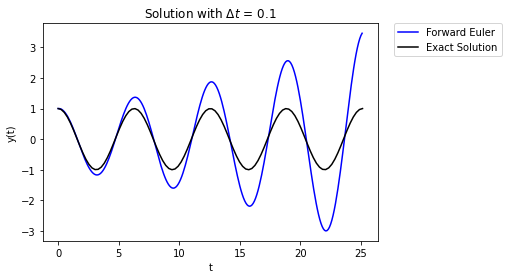

In [3]:
#Set up A
Afunc = lambda t: np.array([(0,-1),(1,0)])
#set up c
c = lambda t: np.zeros(2)
#set up y
y0 = np.array([0,1])
Delta_t = 0.1
t_final = 8*np.pi
t,y = forward_euler_system(Afunc,c,y0,Delta_t,t_final/Delta_t)
plt.plot(t,y[1,:],'-',label="Forward Euler",color="blue")
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,np.cos(t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Yikes, the error grows over time.  What's happening here is that the numerical error builds over time and this causes the magnitude to grow over time. Using a smaller value of $\Delta t$ can help, but not totally remove the problem.

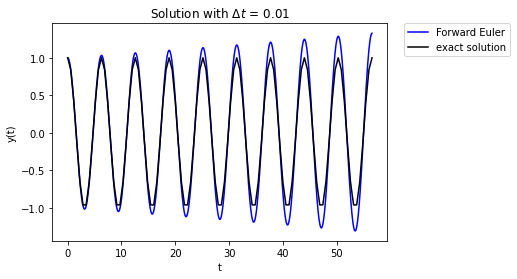

In [4]:
#Set up A function
Afunc = lambda t: np.array([(0,-1),(1,0)])
#set up c
c = lambda t: np.zeros(2)
#set up y
y0 = np.array([0,1])
Delta_t = 0.01
t_final = 18*np.pi
t,y = forward_euler_system(Afunc,c,y0,Delta_t,t_final/Delta_t)
plt.plot(t,y[1,:],'-',label="Forward Euler",color="blue")
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,np.cos(t_fine),label="exact solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

We have really just delayed the inevitable.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Why is this behavior not surprising given what we know about the stability of forward Euler? Discuss with a partner for 30 seconds.
</div>

### Backward (Explicit) Euler

Let's implement backward Euler now; we'll need a linear solver this time (because A is constant).

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Fill in the missing comments below. This is excellent exam practice.
</div>

In [5]:
def backward_euler_system(Afunc,c,y0,Delta_t,numsteps):
    """Perform numsteps of the forward euler method starting at y0
    of the ODE y'(t) = A(t) y(t) + c(t)
    Args:
        Afunc: function to compute A matrix
        c: nonlinear function of time
        y0: initial condition
        Delta_t: time step size
        numsteps: number of time steps
        
    Returns:
        a numpy array of the times and a numpy
        array of the solution at those times
    """
    #
    numsteps = int(numsteps)
    unknowns = y0.size
    
    #
    y = np.zeros((unknowns,numsteps+1))
    t = np.arange(numsteps+1)*Delta_t
    
    #
    y[0:unknowns,0] = y0
    
    #
    for n in range(1,numsteps+1):
        
        #
        yold = y[0:unknowns,n-1]
        
        #
        A = Afunc(t[n])
        
        #
        LHS = np.identity(unknowns) - Delta_t * A
        RHS = yold + c(t[n])*Delta_t
        
        # solving linear system of equations
        y[0:unknowns,n] = np.linalg.solve(LHS,RHS)
    return t, y

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Share your comments with a partner.
</div>

Results with $\Delta t = 0.1$ show that error builds over time.

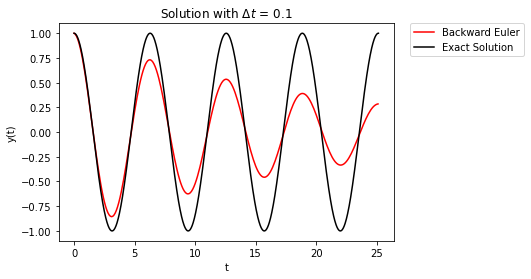

In [6]:
#Set up A
Afunc = lambda t: np.array([(0,-1),(1,0)])
#set up c
c = lambda t: np.zeros(2)
#set up y
y0 = np.array([0,1])
Delta_t = 0.1
t_final = 8*np.pi
t,y = backward_euler_system(Afunc,c,y0,Delta_t,t_final/Delta_t)
plt.plot(t,y[1,:],'-',label="Backward Euler",color="red")
t_fine = np.linspace(0,t_final,1000)
plt.plot(t_fine,np.cos(t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Now the numerical error builds over time, but the error causes the solution to damp out over time.  As before, decreasing $\Delta t$ only delays the onset of the error.

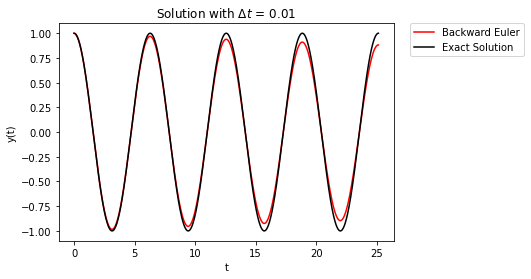

In [7]:
#Set up A function
Afunc = lambda t: np.array([(0,-1),(1,0)])
#set up c
c = lambda t: np.zeros(2)
#set up y
y0 = np.array([0,1])
Delta_t = 0.01
t_final = 8*np.pi
t,y = backward_euler_system(Afunc,c,y0,Delta_t,t_final/Delta_t)
plt.plot(t,y[1,:],'-',label="Backward Euler",color="red")
t_fine = np.linspace(0,t_final,1000)
plt.plot(t_fine,np.cos(t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The takeaway here is that first-order accurate methods have errors that build over time. Forward Euler errors cause the solution to grow, whereas, Backward Euler has the solution damp to zero over time.

### Crack-Nicolson

Now we'll look at Crank-Nicolson to see how it behaves.

In [8]:
def cn_system(Afunc,c,y0,Delta_t,numsteps):
    """Perform numsteps of the forward euler method starting at y0
    of the ODE y'(t) = A(t) y(t) + c(t)
    Args:
        Afunc: function to compute A matrix
        c: nonlinear function of time
        y0: initial condition
        Delta_t: time step size
        numsteps: number of time steps
        
    Returns:
        a numpy array of the times and a numpy
        array of the solution at those times
    """
    numsteps = int(numsteps)
    unknowns = y0.size
    y = np.zeros((unknowns,numsteps+1))
    t = np.arange(numsteps+1)*Delta_t
    y[0:unknowns,0] = y0
    for n in range(1,numsteps+1):
        yold = y[0:unknowns,n-1]
        A = Afunc(t[n])
        LHS = np.identity(unknowns) - 0.5*Delta_t * A
        A = Afunc(t[n-1])
        RHS = yold + 0.5*Delta_t * np.dot(A,yold) + 0.5*(c(t[n-1]) + c(t[n]))*Delta_t
        y[0:unknowns,n] = np.linalg.solve(LHS,RHS)
    return t, y

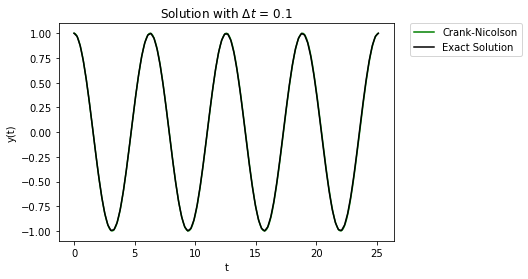

In [9]:
#Set up A
Afunc = lambda t: np.array([(0,-1),(1,0)])
#set up c
c = lambda t: np.zeros(2)
#set up y
y0 = np.array([0,1])
Delta_t = 0.1
t_final = 8*np.pi
t,y = cn_system(Afunc,c,y0,Delta_t,t_final/Delta_t)
plt.plot(t,y[1,:],'-',label="Crank-Nicolson",color="green")
t_fine = np.linspace(0,t_final,100)
plt.plot(t_fine,np.cos(t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Ahh, that's much better.  The error build up is not nearly as large of a problem.  Even if we look at the solution over a much longer time, the error does not affect solution too much:

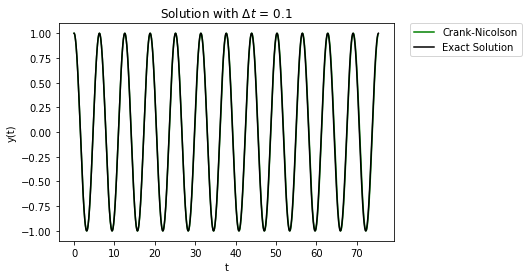

In [10]:
#Set up A
Afunc = lambda t: np.array([(0,-1),(1,0)])
#set up c
c = lambda t: np.zeros(2)
#set up y
y0 = np.array([0,1])
Delta_t = 0.1
t_final = 24*np.pi
t,y = cn_system(Afunc,c,y0,Delta_t,t_final/Delta_t)
plt.plot(t,y[1,:],'-',label="Crank-Nicolson",color="green")
t_fine = np.linspace(0,t_final,1000)
plt.plot(t_fine,np.cos(t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Runge-Kutta

Finally, let's look at fourth-order Runge-Kutta.

In [11]:
def RK4_system(Afunc,c,y0,Delta_t,numsteps):
    """Perform numsteps of the forward euler method starting at y0
    of the ODE y'(t) = f(y,t)
    Args:
        f: function to integrate takes arguments y,t
        y0: initial condition
        Delta_t: time step size
        numsteps: number of time steps
        
    Returns:
        a numpy array of the times and a numpy
        array of the solution at those times
    """
    numsteps = int(numsteps)
    unknowns = y0.size
    y = np.zeros((unknowns,numsteps+1))
    t = np.arange(numsteps+1)*Delta_t
    y[0:unknowns,0] = y0
    for n in range(1,numsteps+1):
        yold = y[0:unknowns,n-1]
        A = Afunc(t[n-1])
        dy1 = Delta_t * (np.dot(A,yold) + c(t[n-1])) 
        A = Afunc(t[n-1] + 0.5*Delta_t)
        dy2 = Delta_t * (np.dot(A,y[0:unknowns,n-1] + 0.5*dy1) 
                         + c(t[n-1] + 0.5*Delta_t))
        dy3 = Delta_t * (np.dot(A,y[0:unknowns,n-1] + 0.5*dy2) 
                         + c(t[n-1] + 0.5*Delta_t))
        A = Afunc(t[n] + Delta_t)
        dy4 = Delta_t * (np.dot(A,y[0:unknowns,n-1] + dy3) + c(t[n]))
        y[0:unknowns,n] = y[0:unknowns,n-1] + 1.0/6.0*(dy1 + 2.0*dy2 + 2.0*dy3 + dy4)
    return t, y

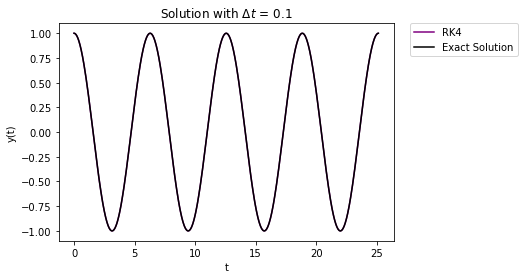

In [12]:
#Set up A
Afunc = lambda t: np.array([(0,-1),(1,0)])
#set up c
c = lambda t: np.zeros(2)
#set up y
y0 = np.array([0,1])
Delta_t = 0.1
t_final = 8*np.pi
t,y = RK4_system(Afunc,c,y0,Delta_t,t_final/Delta_t)
plt.plot(t,y[1,:],'-',label="RK4",color="purple")
t_fine = np.linspace(0,t_final,1000)
plt.plot(t_fine,np.cos(t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Again, the error buildup is miniscule compared to both Euler methods.

## Scipy

In the last few notebooks, we implemented forward Euler, backward Euler, Crank-Nicolson, and Runge-Kutta methods for a few reasons.

First, I wanted to show you how each method builds on several concepts we already learning this semester. I personally find it very satisfying when I have the "ah ha!" moment of clarity and see how concepts connect. My goal is to help facilitate everyone in the class haveing their "ah ha" moment.

Second, by seeing the guts of each method, we can better appreciate their strengths and limitations. You can hopefully imagine yourself in a future semester attempting to numerically integrate differential equations for reaction kinetics, but becoming frustrated late at night as a concentration always approaches infinity. While a model mistake is always a possibility, this behavior is not surprising if you are using an explicit method.

Nevertheless, the Scipy package implements all of the methods we discussed this class session. We should take a few minutes to learn how to use them.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Take a few minutes to review the documentation.
</div>

https://docs.scipy.org/doc/scipy/reference/integrate.html

We see that Scipy supports several integration methods.

| Method Name | Description |
| - | - |
| RK23 | Explicit Runge-Kutta method of order 3(2) | 
| RK45 | Explicit Runge-Kutta method of order 5(4) |
| Radau | Implicit Runge-Kutta method of Radau IIA family of order 5 |
| BDF | Implicit method based on backward-differentiation formulas |
| LSODA | Adams/BDF method with automatic stiffness detection and switching |

Let's revisit our multivariate test problem.

$$\frac{d \mathbf{y}}{dt} = \begin{pmatrix} 0 & -1\\ 1 & 0\end{pmatrix}\mathbf{y}$$

$$
\mathbf{y}(t=0) = \begin{pmatrix} 0 \\ 1 \end{pmatrix}
$$



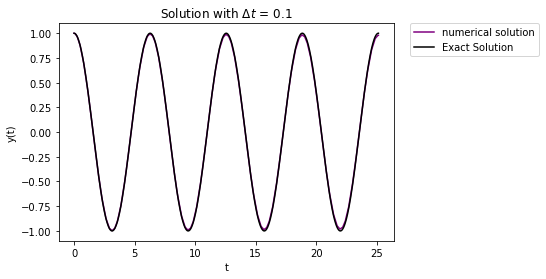

Number of RHS function evaluations: 398
Number of Jacobian evaluations: 0
Number of LU decompositions: 0


In [13]:
# define time range
tspan = [0,t_final]
# tspan = np.arange(0,t_final,Delta_t)

# define function f(t,y)
f_new = lambda t,y: np.array([(0,-1),(1,0)]) @ y

# specify initial condition
y0 = np.array([0,1])

# integration results are stored in 'results' object
results = integrate.solve_ivp(f_new, tspan, y0, method="RK23")

# make plot
plt.plot(results.t,results.y[1,:],'-',label="numerical solution",color="purple")
t_fine = np.linspace(0,t_final,1000)
plt.plot(t_fine,np.cos(t_fine),label="Exact Solution",color="black")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.title("Solution with $\Delta t$ = " + str(Delta_t))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# some solver statistics
print("Number of RHS function evaluations:",results.nfev)
print("Number of Jacobian evaluations:",results.njev)
print("Number of LU decompositions:",results.nlu)

We just need to adjust <tt>method="RK23"</tt> to switch between methods.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: In the code above, compare <tt>method="RK23"</tt> and <tt>method="RK45"</tt>. Look at the plots. In 1 sentence, speculate as to why RK45 requires fewer steps to integrate this problem for a given tolerance.
</div>

**Record Answer Here:**

Below is code that tries all of the methods listed in the table above.

In [49]:
methods = ["RK23", "RK45", "Radau", "BDF", "LSODA"]

for i in methods:

    print("Using method",i)
    
    # integration results are stored in 'results' object
    results = integrate.solve_ivp(f_new, tspan, y0, method=i)

    # some solver statistics
    print("Number of RHS function evaluations:",results.nfev)
    print("Number of Jacobian evaluations:",results.njev)
    print("Number of LU decompositions:",results.nlu)
    
    print("\n")

Using method RK23
Number of RHS function evaluations: 392
Number of Jacobian evaluations: 0
Number of LU decompositions: 0


Using method RK45
Number of RHS function evaluations: 176
Number of Jacobian evaluations: 0
Number of LU decompositions: 0


Using method Radau
Number of RHS function evaluations: 337
Number of Jacobian evaluations: 2
Number of LU decompositions: 10


Using method BDF
Number of RHS function evaluations: 228
Number of Jacobian evaluations: 1
Number of LU decompositions: 20


Using method LSODA
Number of RHS function evaluations: 328
Number of Jacobian evaluations: 0
Number of LU decompositions: 0




<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Discussion</b>: Based on only the output above, which methods are explicit and which methods are implicit? Why?
</div>